In [1]:
from datetime import datetime as dt
import unicodedata
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec

import string
from nltk.corpus import stopwords

## Embeddings

We have our data split into monthly data. Now, we will compare the embeddings from January 2020 and July 2020. 

### Word2Vec Models

We load our word2vec models trained in `embeddings_wordCategories.ipynb`.

In [3]:
# Create a word2vec model for each month
jan_model = Word2Vec.load("models/jan_model.model")
feb_model = Word2Vec.load("models/feb_model.model")
mar_model = Word2Vec.load("models/mar_model.model")
apr_model = Word2Vec.load("models/apr_model.model")
may_model = Word2Vec.load("models/may_model.model")
june_model = Word2Vec.load("models/june_model.model")
july_model = Word2Vec.load("models/july_model.model")

In [4]:
# Test out embedding on one word
jan_model.wv['apple']

array([ 0.43058535,  0.72101843,  0.5788836 , -0.43341   ,  0.6103891 ,
       -0.9263783 ,  0.959213  ,  0.68388057,  0.08593346,  0.13652928,
        0.26632592, -0.06429579,  0.08384904,  0.01715355,  0.17565955,
       -0.37641475, -0.28535435, -0.498663  ,  0.16144502, -0.35861298,
       -0.1666466 ,  0.8536587 ,  0.53627384, -0.50563097, -0.4053061 ,
        0.13179167,  0.1083571 ,  0.2362305 ,  0.4174406 ,  0.3731908 ,
       -0.02903603,  0.07684115,  0.8267458 ,  0.4151472 ,  0.04798637,
        0.02801921,  0.3683494 , -0.7271027 , -0.6145764 , -0.2537021 ,
       -0.66522855,  0.04356118,  0.50509983,  0.242412  ,  0.6576062 ,
       -0.2375747 , -0.09078398,  0.008487  , -0.6785255 , -0.20745823,
       -0.69696313, -0.40420136, -0.5148108 ,  0.07318664,  0.0228732 ,
        0.21924476,  0.31020945,  0.0950743 , -0.2014623 , -0.6728841 ,
        0.897744  ,  0.596179  ,  0.6253877 ,  0.08707827, -0.38548008,
       -0.21983826,  0.01486751,  0.42383674,  0.1890692 ,  0.28

## Group Word Lists 

We need to get word lists for both Asian and White names so that we can separate the two from the articles. We get this information from _Word Embeddings Quantify 100 Years of Gender and Ethnic Stereotypes_.

In [5]:
white_last_names = ['harris', 'nelson', 'robinson', 'thompson', 'moore', 'wright', 'anderson', 'clark', 'jackson', 'taylor', 'scott', 'davis',
'allen', 'adams', 'lewis', 'williams', 'jones', 'wilson', 'martin', 'johnson']

len(white_last_names)

20

In [6]:
chinese_last_names = ['chung', 'liu', 'wong', 'huang', 'ng','hu', 'chu', 'chen', 'lin', 'liang', 'wang', 'wu', 'yang', 'tang', 'chang', 'hong', 'li']
asian_last_names = ['cho', 'wong', 'tang', 'huang', 'chu', 'chung', 'ng', 'wu', 'liu', 'chen', 'lin', 'yang', 'kim', 'chang', 'shah', 'wang', 'li', 'khan',
'singh', 'hong'] + chinese_last_names

# Get unique last names to avoid any repeats
asian_last_names = np.unique(np.array(asian_last_names))

asian_last_names.shape

(22,)

We have 20 White last names and 22 Asian last names. We get the embeddings for each last name for each month and then we get the group representational vector for each ethnicity.

**White Last Names**

In [7]:
# Get embedding for every word
whiteEmb_jan = np.array([jan_model.wv[name] for name in white_last_names])
whiteEmb_feb = np.array([feb_model.wv[name] for name in white_last_names])
whiteEmb_mar = np.array([mar_model.wv[name] for name in white_last_names])
whiteEmb_apr = np.array([apr_model.wv[name] for name in white_last_names])
whiteEmb_may = np.array([may_model.wv[name] for name in white_last_names])
whiteEmb_june = np.array([june_model.wv[name] for name in white_last_names])
whiteEmb_july = np.array([july_model.wv[name] for name in white_last_names])

whiteEmb_jan.shape

(20, 100)

In [8]:
whiteGroup_jan = np.mean(whiteEmb_jan, axis=0)
whiteGroup_feb = np.mean(whiteEmb_feb, axis=0)
whiteGroup_mar = np.mean(whiteEmb_mar, axis=0)
whiteGroup_apr = np.mean(whiteEmb_apr, axis=0)
whiteGroup_may = np.mean(whiteEmb_may, axis=0)
whiteGroup_june = np.mean(whiteEmb_june, axis=0)
whiteGroup_july = np.mean(whiteEmb_july, axis=0)

Then, we repeat this process with Asian last names.

**Asian Last Names**

In [9]:
# Get embedding for every word
asianEmb_jan = np.array([jan_model.wv[name] for name in asian_last_names])
asianEmb_feb = np.array([feb_model.wv[name] for name in asian_last_names])
asianEmb_mar = np.array([mar_model.wv[name] for name in asian_last_names])
asianEmb_apr = np.array([apr_model.wv[name] for name in asian_last_names])
asianEmb_may = np.array([may_model.wv[name] for name in asian_last_names])
asianEmb_june = np.array([june_model.wv[name] for name in asian_last_names])
asianEmb_july = np.array([july_model.wv[name] for name in asian_last_names])

asianEmb_jan.shape

(22, 100)

In [10]:
asianGroup_jan = np.mean(asianEmb_jan, axis=0)
asianGroup_feb = np.mean(asianEmb_feb, axis=0)
asianGroup_mar = np.mean(asianEmb_mar, axis=0)
asianGroup_apr = np.mean(asianEmb_apr, axis=0)
asianGroup_may = np.mean(asianEmb_may, axis=0)
asianGroup_june = np.mean(asianEmb_june, axis=0)
asianGroup_july = np.mean(asianEmb_july, axis=0)

## Other Word Lists

From reading articles and the following papers, the following categories for word lists have been created. We will be quantifying the association between Asians (relative to Whites) for:
1. COVID-19 related terms
2. Hate Crime related terms
3. Outsider Adjectives
4. General list of adjectives

The first three will be used to determine if they follow global events, i.e. reports from news articles and papers on the effects of COVID-19 in. The latter will then be used with a sentiment analysis to determine if more negative adjectives are being associated with Asians vs. Whites if time persists. 

We read these word lists in from a self-created CSV file. We get oustider adjectives from [1].

https://www.pbs.org/newshour/nation/asian-americans-describe-gut-punch-of-racist-attacks-during-coronavirus-pandemic
https://www.frontiersin.org/articles/10.3389/fcomm.2020.00039/full

In [11]:
word_lists = pd.read_csv('data/wordlists.csv')
word_lists.head()

,covid,hate_crime,outsider
0,coronavirus,harassment,devious
1,virus,assault,bizarre
2,covid,murder,venomous
3,flu,arson,erratic
4,bat,vandalism,barbaric


In [12]:
covid = word_lists.covid.values
hate_crime = word_lists.hate_crime.values
outsider = word_lists.outsider.values

First, we want to determine words that are present in all of the months as these are the only embeddings that we can compare over time.

**Check which words are in all of the months**

In [13]:
jan_words = jan_model.wv.key_to_index
feb_words = feb_model.wv.key_to_index
mar_words = mar_model.wv.key_to_index
apr_words = apr_model.wv.key_to_index
may_words = may_model.wv.key_to_index
june_words = june_model.wv.key_to_index
july_words = july_model.wv.key_to_index

In [14]:
def check_words(lst):
    final_lst = []
    for word in lst:
        if (word in jan_words) & (word in feb_words) & (word in mar_words) & (word in apr_words) & (word in may_words) & (word in june_words) & (word in july_words):
            final_lst.append(word)
    return final_lst

In [15]:
covid_lst = check_words(covid)
hate_lst = check_words(hate_crime)
outsider_lst = check_words(outsider)

In [16]:
print(covid_lst)
print(hate_lst)
print(outsider_lst)

['coronavirus', 'virus', 'flu', 'bat', 'sick', 'disease', 'infectious', 'contagious']
['assault', 'murder', 'arson', 'vandalism', 'threats', 'hate', 'spitting', 'attack']
['bizarre', 'erratic', 'frightening', 'forceful', 'deceptive', 'greedy', 'hateful', 'brutal', 'monstrous', 'calculating', 'cruel', 'aggressive', 'monstrous']


In [17]:
len(covid_lst), len(hate_lst), len(outsider_lst)

(8, 8, 13)

These are the words that appear in every month of data. Next, we get the embeddings for each of these words.

## Embeddings

In [18]:
def get_embeddings(lst, model):
    emb_lst = []
    for word in lst:
        embs = []
        emb = model.wv[word]
        emb_lst.append(emb)
    return emb_lst

In [19]:
# January
covidEmb_jan = np.array(get_embeddings(covid_lst, jan_model))
hateEmb_jan = np.array(get_embeddings(hate_lst, jan_model))
outsiderEmb_jan = np.array(get_embeddings(outsider_lst, jan_model))

# February
covidEmb_feb = np.array(get_embeddings(covid_lst, feb_model))
hateEmb_feb = np.array(get_embeddings(hate_lst, feb_model))
outsiderEmb_feb = np.array(get_embeddings(outsider_lst, feb_model))

# March
covidEmb_mar = np.array(get_embeddings(covid_lst, mar_model))
hateEmb_mar = np.array(get_embeddings(hate_lst, mar_model))
outsiderEmb_mar = np.array(get_embeddings(outsider_lst, mar_model))

# April
covidEmb_apr = np.array(get_embeddings(covid_lst, apr_model))
hateEmb_apr = np.array(get_embeddings(hate_lst, apr_model))
outsiderEmb_apr = np.array(get_embeddings(outsider_lst, apr_model))

# May
covidEmb_may = np.array(get_embeddings(covid_lst, may_model))
hateEmb_may = np.array(get_embeddings(hate_lst, may_model))
outsiderEmb_may = np.array(get_embeddings(outsider_lst, may_model))

# June
covidEmb_june = np.array(get_embeddings(covid_lst, june_model))
hateEmb_june = np.array(get_embeddings(hate_lst, june_model))
outsiderEmb_june = np.array(get_embeddings(outsider_lst, june_model))

# July
covidEmb_july = np.array(get_embeddings(covid_lst, july_model))
hateEmb_july = np.array(get_embeddings(hate_lst, july_model))
outsiderEmb_july = np.array(get_embeddings(outsider_lst, july_model))

## Embedding Similarity
Now, for each of these words, we can compute the association with the words in each category and the group representational vector for Asian and White last names.

### COVID

In [20]:
# Bias with Asian vector
covidAsian_jan = np.linalg.norm(covidEmb_jan - asianGroup_jan, axis=1)
covidAsian_feb = np.linalg.norm(covidEmb_feb - asianGroup_feb, axis=1)
covidAsian_mar = np.linalg.norm(covidEmb_mar - asianGroup_mar, axis=1)
covidAsian_apr = np.linalg.norm(covidEmb_apr - asianGroup_apr, axis=1)
covidAsian_may = np.linalg.norm(covidEmb_may - asianGroup_may, axis=1)
covidAsian_june = np.linalg.norm(covidEmb_june - asianGroup_june, axis=1)
covidAsian_july = np.linalg.norm(covidEmb_july - asianGroup_july, axis=1)

In [21]:
covidAsian = np.array([covidAsian_jan, covidAsian_feb, covidAsian_mar, covidAsian_apr, covidAsian_may, 
                       covidAsian_june, covidAsian_july])

In [22]:
# Average similarity 
np.mean(covidAsian, axis=1)

array([3.400919 , 3.5520096, 3.1742523, 3.233101 , 3.3600745, 3.447381 ,
       3.5335612], dtype=float32)

In [23]:
# Deviation between months 
np.sqrt(np.var(covidAsian,axis=1))

array([0.36803395, 0.39287305, 0.44079563, 0.3371015 , 0.32514325,
       0.4597309 , 0.39764673], dtype=float32)

In [24]:
# Bias with White vector
covidWhite_jan = np.linalg.norm(covidEmb_jan - whiteGroup_jan, axis=1)
covidWhite_feb = np.linalg.norm(covidEmb_feb - whiteGroup_feb, axis=1)
covidWhite_mar = np.linalg.norm(covidEmb_mar - whiteGroup_mar, axis=1)
covidWhite_apr = np.linalg.norm(covidEmb_apr - whiteGroup_apr, axis=1)
covidWhite_may = np.linalg.norm(covidEmb_may - whiteGroup_may, axis=1)
covidWhite_june = np.linalg.norm(covidEmb_june - whiteGroup_june, axis=1)
covidWhite_july = np.linalg.norm(covidEmb_july - whiteGroup_july, axis=1)

In [25]:
covidWhite = np.array([covidWhite_jan, covidWhite_feb, covidWhite_mar, covidWhite_apr, covidWhite_may,
                       covidWhite_june, covidWhite_july])

In [26]:
# Average similarity 
np.mean(covidWhite, axis=1)

array([3.5730915, 3.6279552, 3.3227506, 3.4617076, 3.4500704, 3.6256235,
       3.62858  ], dtype=float32)

In [27]:
# Deviation between months 
np.sqrt(np.var(covidWhite,axis=1))

array([0.3250969 , 0.3564468 , 0.4220509 , 0.33155787, 0.3170431 ,
       0.4751653 , 0.5225158 ], dtype=float32)

#### Plot

In [28]:
np.mean(covidWhite, axis=1)

array([3.5730915, 3.6279552, 3.3227506, 3.4617076, 3.4500704, 3.6256235,
       3.62858  ], dtype=float32)

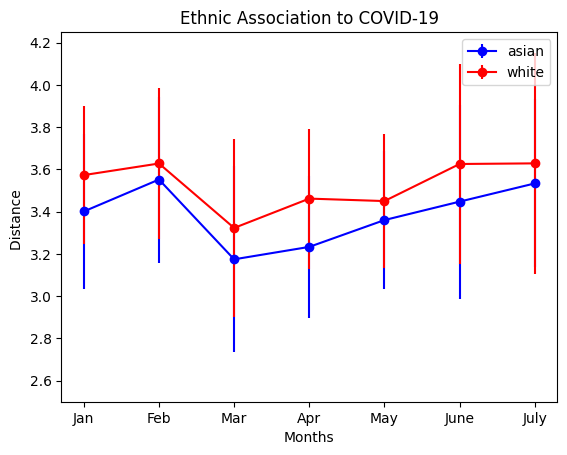

In [29]:
fig, ax = plt.subplots()

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July']

ax.errorbar(x=months, y=np.mean(covidAsian, axis=1), yerr=np.sqrt(np.var(covidAsian,axis=1)), fmt='-o', color='blue', label='asian')
ax.errorbar(x=months, y=np.mean(covidWhite, axis=1), yerr=np.sqrt(np.var(covidWhite,axis=1)), fmt='-o', color='red', label='white')

ax.set_xlabel('Months')
ax.set_ylabel('Distance ')
ax.set_title('Ethnic Association to COVID-19')
ax.set_ylim(2.5, 4.25)
ax.legend()
plt.show()

To interpret these graphs, we note that the smaller the distance, the closer together the words are. The COVID words are more associated for Asian last names than White last names from the plot above.

### Hate Crime

In [30]:
# Bias with Asian vector
hateAsian_jan = np.linalg.norm(hateEmb_jan - asianGroup_jan, axis=1)
hateAsian_feb = np.linalg.norm(hateEmb_feb - asianGroup_feb, axis=1)
hateAsian_mar = np.linalg.norm(hateEmb_mar - asianGroup_mar, axis=1)
hateAsian_apr = np.linalg.norm(hateEmb_apr - asianGroup_apr, axis=1)
hateAsian_may = np.linalg.norm(hateEmb_may - asianGroup_may, axis=1)
hateAsian_june = np.linalg.norm(hateEmb_june - asianGroup_june, axis=1)
hateAsian_july = np.linalg.norm(hateEmb_july - asianGroup_july, axis=1)

In [31]:
hateAsian = np.array([hateAsian_jan, hateAsian_feb, hateAsian_mar, hateAsian_apr, hateAsian_may,
                     hateAsian_june, hateAsian_july])

In [32]:
# Average similarity 
np.mean(hateAsian, axis=1)

array([2.9152424, 2.9237435, 2.5258605, 2.9220505, 2.9622881, 3.2984333,
       3.0123205], dtype=float32)

In [33]:
# Deviation between months 
np.sqrt(np.var(hateAsian,axis=1))

array([0.6947583 , 0.6534669 , 0.65022147, 0.5350572 , 0.6065127 ,
       0.40159577, 0.5516424 ], dtype=float32)

In [34]:
# Bias with White vector
hateWhite_jan = np.linalg.norm(hateEmb_jan - whiteGroup_jan, axis=1)
hateWhite_feb = np.linalg.norm(hateEmb_feb - whiteGroup_feb, axis=1)
hateWhite_mar = np.linalg.norm(hateEmb_mar - whiteGroup_mar, axis=1)
hateWhite_apr = np.linalg.norm(hateEmb_apr - whiteGroup_apr, axis=1)
hateWhite_may = np.linalg.norm(hateEmb_may - whiteGroup_may, axis=1)
hateWhite_june = np.linalg.norm(hateEmb_june - whiteGroup_june, axis=1)
hateWhite_july = np.linalg.norm(hateEmb_july - whiteGroup_july, axis=1)

In [35]:
hateWhite = np.array([hateWhite_jan, hateWhite_feb, hateWhite_mar, hateWhite_apr, hateWhite_may,
                     hateWhite_june, hateWhite_july])

In [36]:
# Average similarity 
np.mean(hateWhite, axis=1)

array([2.909432 , 2.9241877, 2.7989073, 3.1868424, 3.0662072, 3.3602428,
       3.150001 ], dtype=float32)

In [37]:
# Deviation between months 
np.sqrt(np.var(hateWhite,axis=1))

array([0.7283897 , 0.55350685, 0.6429192 , 0.4377158 , 0.52583927,
       0.2879809 , 0.4621833 ], dtype=float32)

#### Plot

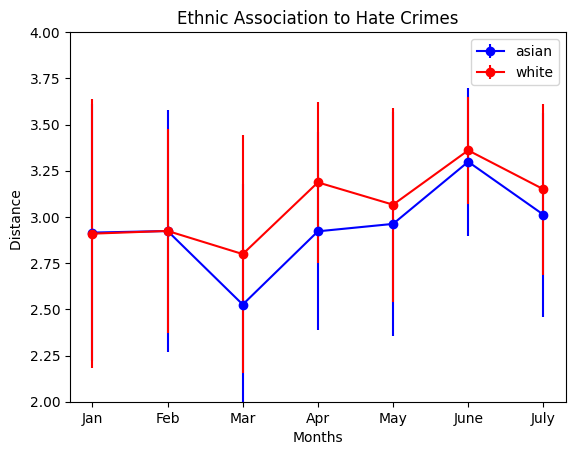

In [38]:
fig, ax = plt.subplots()

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July']

ax.errorbar(x=months, y=np.mean(hateAsian, axis=1), yerr=np.sqrt(np.var(hateAsian,axis=1)), fmt='-o', color='blue', label='asian')
ax.errorbar(x=months, y=np.mean(hateWhite, axis=1), yerr=np.sqrt(np.var(hateWhite,axis=1)), fmt='-o', color='red', label='white')

ax.set_xlabel('Months')
ax.set_ylabel('Distance ')
ax.set_title('Ethnic Association to Hate Crimes')
ax.set_ylim(2,4)
ax.legend()
plt.show()

In January abd February, we can see that the association is very close for both Asian and White last names. After that we have a difference in the association with hate crimes being more associated with Asian last names, especially in March.

This may be due to the fact that in March, coronavirus was deemed a global pandemic and may have resulted in more unjustified anger towards the Asian community. 

### Outsider Adjectives

In [39]:
# Bias with Asian vector
outsiderAsian_jan = np.linalg.norm(outsiderEmb_jan - asianGroup_jan, axis=1)
outsiderAsian_feb = np.linalg.norm(outsiderEmb_feb - asianGroup_feb, axis=1)
outsiderAsian_mar = np.linalg.norm(outsiderEmb_mar - asianGroup_mar, axis=1)
outsiderAsian_apr = np.linalg.norm(outsiderEmb_apr - asianGroup_apr, axis=1)
outsiderAsian_may = np.linalg.norm(outsiderEmb_may - asianGroup_may, axis=1)
outsiderAsian_june = np.linalg.norm(outsiderEmb_june - asianGroup_june, axis=1)
outsiderAsian_july = np.linalg.norm(outsiderEmb_july - asianGroup_july, axis=1)

In [40]:
outsiderAsian = np.array([outsiderAsian_jan, outsiderAsian_feb, outsiderAsian_mar, outsiderAsian_apr, outsiderAsian_may, 
                         outsiderAsian_june, outsiderAsian_july])

In [41]:
# Averages similarity
np.mean(outsiderAsian, axis=1)

array([2.3388398, 2.516744 , 2.12501  , 2.1744695, 2.2912226, 2.2851195,
       2.2929957], dtype=float32)

In [42]:
# Deviation between months 
np.sqrt(np.var(outsiderAsian,axis=1))

array([0.5049798 , 0.43312168, 0.5028081 , 0.52395374, 0.42900267,
       0.50823647, 0.54560053], dtype=float32)

In [43]:
# Bias with White vector
outsiderWhite_jan = np.linalg.norm(outsiderEmb_jan - whiteGroup_jan, axis=1)
outsiderWhite_feb = np.linalg.norm(outsiderEmb_feb - whiteGroup_feb, axis=1)
outsiderWhite_mar = np.linalg.norm(outsiderEmb_mar - whiteGroup_mar, axis=1)
outsiderWhite_apr = np.linalg.norm(outsiderEmb_apr - whiteGroup_apr, axis=1)
outsiderWhite_may = np.linalg.norm(outsiderEmb_may - whiteGroup_may, axis=1)
outsiderWhite_june = np.linalg.norm(outsiderEmb_june - whiteGroup_june, axis=1)
outsiderWhite_july = np.linalg.norm(outsiderEmb_july - whiteGroup_july, axis=1)

In [44]:
outsiderWhite = np.array([outsiderWhite_jan, outsiderWhite_feb, outsiderWhite_mar, outsiderWhite_apr, outsiderWhite_may,
                         outsiderWhite_june, outsiderWhite_july])

In [45]:
# Average similarity
np.mean(outsiderWhite, axis=1)

array([2.2198484, 2.4711835, 2.2380066, 2.3576837, 2.3496985, 2.4514067,
       2.4299264], dtype=float32)

In [46]:
# Deviation between months 
np.sqrt(np.var(outsiderWhite,axis=1))

array([0.5431008 , 0.4816178 , 0.47213733, 0.4599666 , 0.45024073,
       0.446056  , 0.5732113 ], dtype=float32)

#### Plots

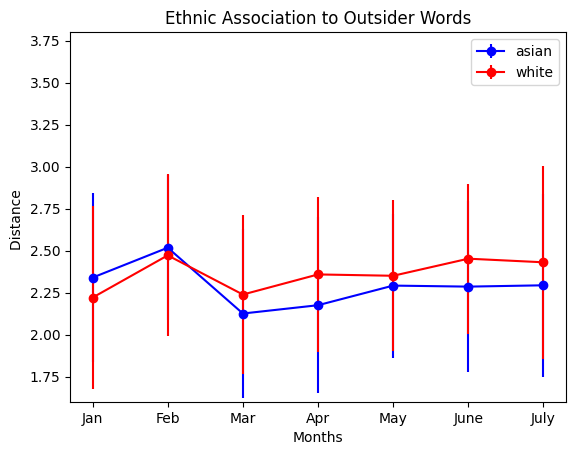

In [47]:
fig, ax = plt.subplots()

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July']

ax.errorbar(x=months, y=np.mean(outsiderAsian, axis=1), yerr=np.sqrt(np.var(outsiderAsian,axis=1)), fmt='-o', color='blue', label='asian')
ax.errorbar(x=months, y=np.mean(outsiderWhite, axis=1), yerr=np.sqrt(np.var(outsiderWhite,axis=1)), fmt='-o', color='red', label='white')

ax.set_xlabel('Months')
ax.set_ylabel('Distance ')
ax.set_title('Ethnic Association to Outsider Words')
ax.set_ylim(1.6, 3.8)
ax.legend()
plt.show()

We see a similar trend to hate crime words. We have that in January and February, the trends are very close together for both ethnicities. After March, we have that the outsider words are more associated with Asians; however, the trend does not seem to be increasing during the pandemic. The bias exists but appears to be more stagnant.

## Significance Test 

We run a two-sample significance test using the t-statistic since we have a smaller sample size to determine if there is a significant difference between asian and white association over each month.

In [48]:
import scipy.stats as stats
from scipy.stats import ks_2samp

### COVID-19

In [49]:
covidAsian.shape, covidWhite.shape

((7, 8), (7, 8))

For every month, we have 8 values (i.e. 8 covid words to compare)

In [50]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July']
for i in range(7):
    print(months[i])
    print(stats.ttest_ind(a=covidAsian[i], b=covidWhite[i], equal_var=False))

January
Ttest_indResult(statistic=-0.9276432690915958, pvalue=0.36954510294803933)
February
Ttest_indResult(statistic=-0.378779900206371, pvalue=0.7105865361808055)
March
Ttest_indResult(statistic=-0.643797771426149, pvalue=0.5301320220995468)
April
Ttest_indResult(statistic=-1.2791842965512341, pvalue=0.22163354274722644)
May
Ttest_indResult(statistic=-0.5243133944000054, pvalue=0.6082677484008773)
June
Ttest_indResult(statistic=-0.7132677200565081, pvalue=0.4874129240949516)
July
Ttest_indResult(statistic=-0.38286605334727675, pvalue=0.7079726143032734)


Our null hypothesis is that the two means are equal, i.e. the average association with the categorical words is the same for both white and asian last names. From our results, we see that we have high p-values for each month so we do not have significant evidence to reject the null hypothesis.

### Hate Crime

In [51]:
hateAsian.shape, hateWhite.shape

((7, 8), (7, 8))

For every month, we have 8 values (i.e. 8 covid words to compare)

In [52]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July']
for i in range(7):
    print(months[i])
    print(stats.ttest_ind(a=hateAsian[i], b=hateWhite[i], equal_var=False))

January
Ttest_indResult(statistic=0.015272360236034037, pvalue=0.9880308815390133)
February
Ttest_indResult(statistic=-0.0013722550544523625, pvalue=0.9989249795829496)
March
Ttest_indResult(statistic=-0.7900386167666629, pvalue=0.4426836162765597)
April
Ttest_indResult(statistic=-1.0134300848201485, pvalue=0.3287120061000297)
May
Ttest_indResult(statistic=-0.342513935581586, pvalue=0.7371532226427121)
June
Ttest_indResult(statistic=-0.3309183747924147, pvalue=0.7461050198924057)
July
Ttest_indResult(statistic=-0.5061614499779845, pvalue=0.6208583611205007)


Our null hypothesis is that the two means are equal, i.e. the average association with the categorical words is the same for both white and asian last names. From our results, we see that we have high p-values for each month so we do not have significant evidence to reject the null hypothesis.

### Outsider Adjectives

In [53]:
outsiderAsian.shape, outsiderWhite.shape

((7, 13), (7, 13))

For every month, we have 13 values (i.e. 13 outsider words to compare)

In [54]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July']
for i in range(7):
    print(months[i])
    print(stats.ttest_ind(a=outsiderAsian[i], b=outsiderWhite[i], equal_var=False))

January
Ttest_indResult(statistic=0.5558266110856493, pvalue=0.5835014212618437)
February
Ttest_indResult(statistic=0.24366090886377162, pvalue=0.809587218277968)
March
Ttest_indResult(statistic=-0.5675129828445277, pvalue=0.5756571942132673)
April
Ttest_indResult(statistic=-0.9103079945219502, pvalue=0.3718627613748967)
May
Ttest_indResult(statistic=-0.32572213757722024, pvalue=0.7474640505597215)
June
Ttest_indResult(statistic=-0.8518495938888924, pvalue=0.4028584428996256)
July
Ttest_indResult(statistic=-0.5994006405014797, pvalue=0.5545362295037846)


Our null hypothesis is that the two means are equal, i.e. the average association with the categorical words is the same for both white and asian last names. From our results, we see that we have high p-values for each month so we do not have significant evidence to reject the null hypothesis.

_____

## Test between Time Periods

Another test that we can run is to see if there were any significant changes in the ethnic association over each month. For this task, we will use Pearson correlation between the time periods to see if the correlation between average associations changes. We will then use a Kolmogorov-Smirnoff test to determine if there are significant changes between months.

#### COVID

In [55]:
covid_df = pd.DataFrame(covidAsian - covidWhite).T
covid_df.columns=months
covid_df.head()

,January,February,March,April,May,June,July
0,-0.178919,0.008665,-0.078143,-0.200234,-0.058011,-0.130044,-0.128538
1,-0.298000,-0.194708,-0.234529,-0.362064,-0.200797,-0.302163,-0.146982
2,0.034965,0.056267,-0.045501,-0.130646,0.001033,-0.179843,-0.120570
3,-0.235705,-0.090978,-0.221680,-0.269134,-0.104853,-0.149184,0.364988
4,-0.274651,-0.177017,0.081664,0.005795,0.206655,0.113454,0.095762


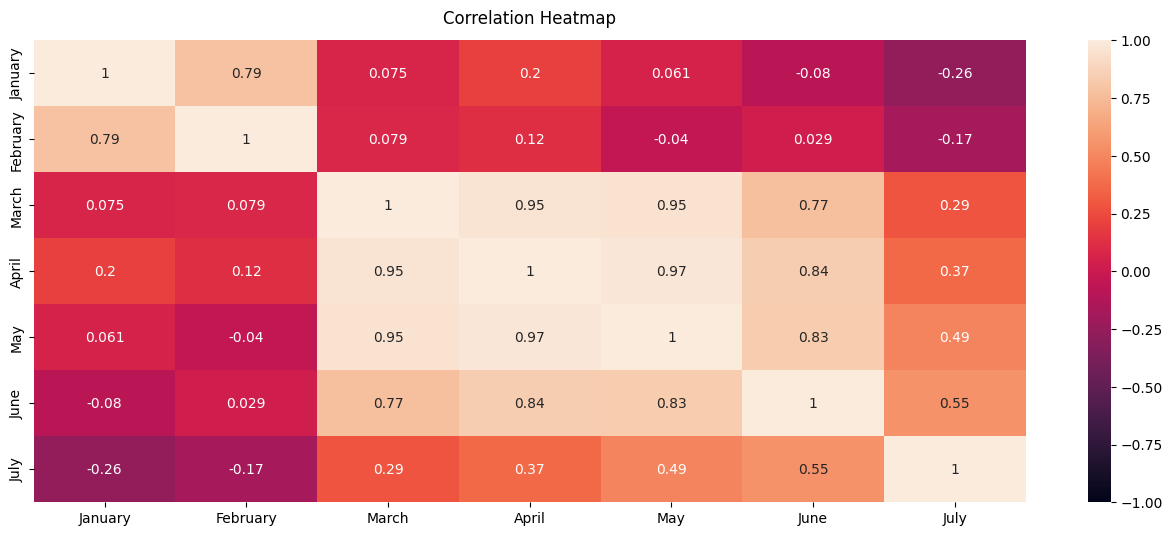

In [56]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(covid_df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

We see two clear blocks between February and March and possibly between June and July as well.

Next, we test the significance of these changes in correlation over the months. 

This is done using the Kolmogorov-Smirnoff (K-S) test where we first take the differences between the correlation from adjacent months. This is the change in associationsand then we test whether a given set of differences (i.e. between two specific months) is different than the rest of the differences. This is using a K-S 2 sample test. We use adapted code from "Word Embeddings Quantify 100 Years of Ethnic and Gender Bias" to generate these results.

In [57]:
def test_month_shift(months_to_include, df):
    lst = []
    test = [[] for _ in range(len(months_to_include)-1)]
    for i in range(len(months_to_include)-1):
        for j in range(len(df.iloc[i,:])):
            test[i].append(abs(df.iloc[i+1, j] - df.iloc[i, j]))
    for current_checking in range(len(months_to_include)-1):
        print('current checking:', months[current_checking] + ' to ' + months[current_checking+1])
        adjacent_difs_actualtestones = test[current_checking]
        all_others = []
        for i in range(len(months_to_include)-1):
            if i is not current_checking:
                all_others.extend(test[i])
        lst.append(ks_2samp(adjacent_difs_actualtestones,all_others)[1])
        
    return lst

In [58]:
test_month_shift(months, covid_df.corr())

current checking: January to February
current checking: February to March
current checking: March to April
current checking: April to May
current checking: May to June
current checking: June to July


[0.346928023115443,
 2.668808830554658e-06,
 0.007270057655166769,
 0.046846565139248064,
 0.14140624281830955,
 0.001252857478788159]

We notice that we have significant changes between February to March, March to April, April to May and June to July.

#### Hate Crime

In [59]:
hate_df = pd.DataFrame(hateAsian - hateWhite).T
hate_df.columns=months
hate_df.head()

,January,February,March,April,May,June,July
0,-0.092906,0.121508,-0.267203,-0.056813,0.084315,-0.050693,-0.188462
1,0.121248,0.043140,-0.169859,0.008373,0.075154,0.257145,0.010840
2,0.109812,-0.136689,-0.261590,-0.409009,-0.159595,0.002636,-0.318409
3,0.146204,-0.168282,-0.313917,-0.395187,-0.203751,-0.013860,-0.243977
4,0.065082,0.098203,-0.401329,-0.347808,-0.262327,-0.436002,-0.289482


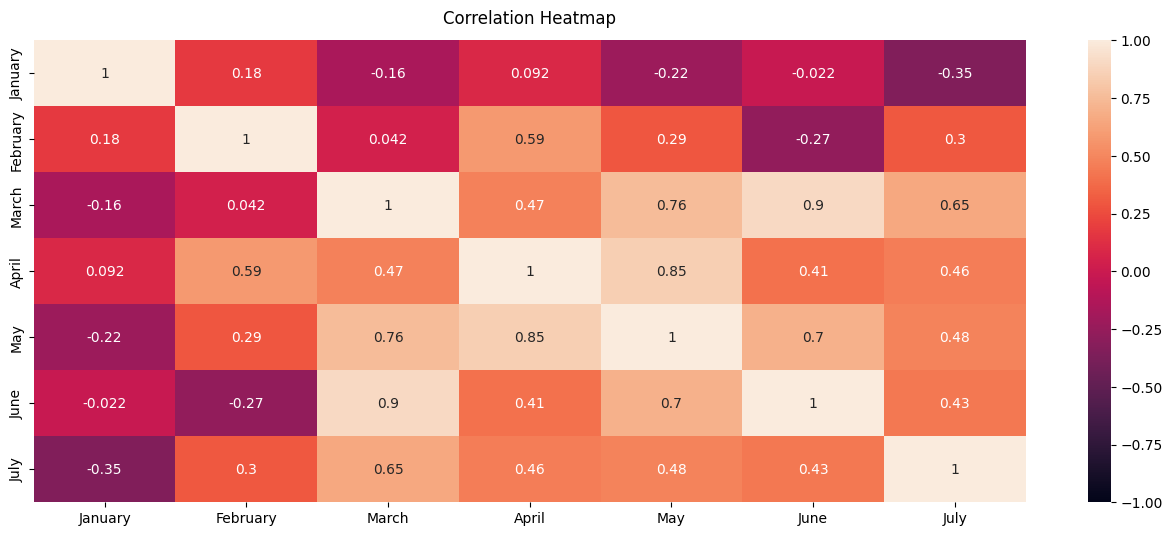

In [60]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(hate_df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

There appears to be a change between February to March.

In [61]:
test_month_shift(months, hate_df.corr())

current checking: January to February
current checking: February to March
current checking: March to April
current checking: April to May
current checking: May to June
current checking: June to July


[0.195055898200956,
 0.14140624281830955,
 0.6725347842164273,
 0.019550581488964033,
 0.5511706285133756,
 0.7906419552761018]

We only see a significant change between April and May which seems strange given our heatmap.

#### Outsider Adjectives

In [62]:
outsider_df = pd.DataFrame(outsiderAsian - outsiderWhite).T
outsider_df.columns=months
outsider_df.head()

,January,February,March,April,May,June,July
0,0.029903,-0.038292,-0.048829,0.025216,0.038858,0.111643,0.075150
1,0.266576,0.093654,-0.225521,-0.158967,-0.115463,-0.333641,-0.144259
2,-0.056296,-0.065363,0.079625,0.069688,0.139207,-0.047366,-0.169014
3,0.048350,-0.379960,-0.082211,-0.367304,-0.134074,-0.449429,-0.010268
4,0.108492,-0.020252,-0.267415,-0.336318,-0.288247,-0.589896,-0.332551


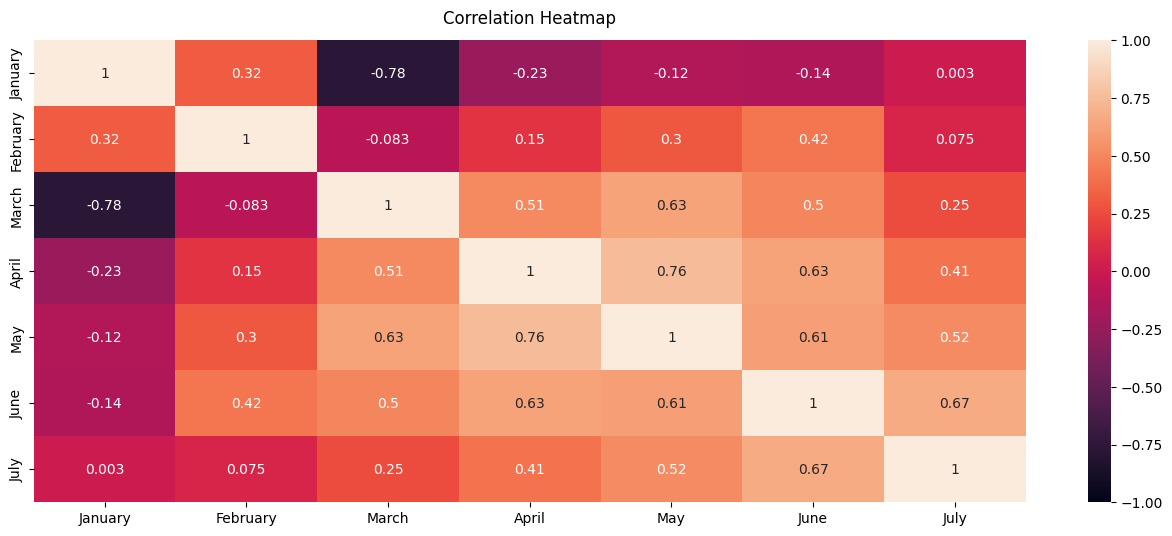

In [63]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(outsider_df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

We see potential blocks between January and February and February and March and then again around April and May.

In [64]:
test_month_shift(months, outsider_df.corr())

current checking: January to February
current checking: February to March
current checking: March to April
current checking: April to May
current checking: May to June
current checking: June to July


[0.012151531406987118,
 0.195055898200956,
 0.5511706285133756,
 0.030636739237509453,
 0.195055898200956,
 0.195055898200956]

We see that we have significnat changes as expected from the heatmap.

_______

## Embedding Bias

We calculate the embedding bias for each word in a category by computing the following for every category:
$$\delta_{\text{word}} = \mu_{\text{white}} - \mu_{\text{asian}}$$

where $\mu_{\text{white}}$ represents the association of a word in a category to white last names and $\mu_{\text{asian}}$ represents association of a word in a category to asian last names.

We then take the average of $\delta_{\text{word}}$ for every category to calculate the average embedding bias, we can denote this by $\Delta$.

Case 1: $\Delta > 0 \implies \mu_{\text{Asian}} > \mu_{\text{White}}$

This means that the distance between Asian last names and the category is larger than the distance between White last names. Hence, the category is more associated with White last names. 

Case 2: $\Delta < 0 \implies \mu_{\text{White}} > \mu_{\text{Asian}}$

This means that the distance between White last names and the category is larger than the distance between Asian last names. Hence, the category is more associated with Asian last names. 

### COVID 

In [65]:
# Average embedding bias
covid_bias = np.mean(covidAsian - covidWhite, axis=1)

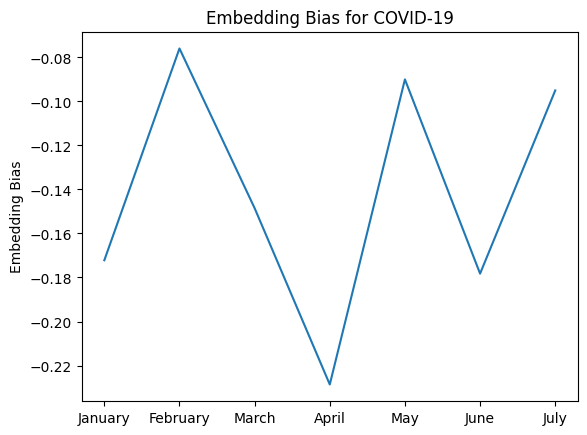

In [66]:
plt.plot(months, covid_bias)
plt.ylabel('Embedding Bias')
plt.title('Embedding Bias for COVID-19')

plt.show()

We have a relatively fluctuating embedding bias here. However, we do notice that all the values are negative; hence, COVID-terms are more closely associated with the Asian ethnicity.

### Hate Crime Words 

In [67]:
# Average embedding bias
hate_bias = np.mean(hateAsian - hateWhite, axis=1)

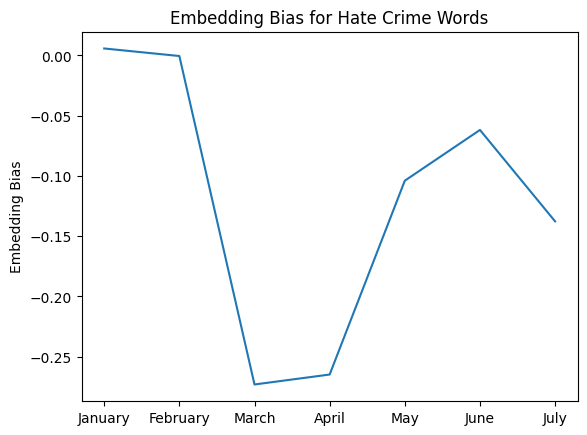

In [68]:
plt.plot(months, hate_bias)
plt.ylabel('Embedding Bias')
plt.title('Embedding Bias for Hate Crime Words')

plt.show()

We see that the bias increases during the starting months of the pandemic and then starts to decrease (gets more positive). In either case, all the values are negative; hence, hate crime terms are more closely associated with the Asian ethnicity.

### Outsider Adjectives

In [69]:
# Average embedding bias
outsider_bias = np.mean(outsiderAsian - outsiderWhite, axis=1)

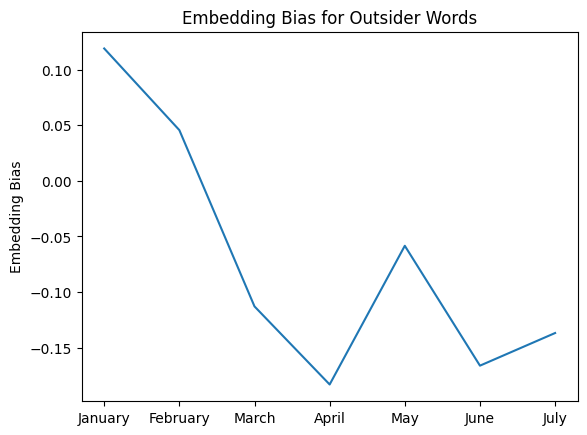

In [70]:
plt.plot(months, outsider_bias)
plt.ylabel('Embedding Bias')
plt.title('Embedding Bias for Outsider Words')

plt.show()

We see that the bias increases during the starting months of the pandemic and then starts to decrease slightly (gets more positive). We see that it starts to increase again after May, however we only have data for the next few months after that. In either case, all the values are negative; hence, outsider adjectives are more closely associated with the Asian ethnicity.